<a href="https://colab.research.google.com/github/ClauRozasG/Analisis-OMS/blob/main/Analisis_de_Whatsapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_table('_chat.txt', header=None, names=['Chat'])
df

,Chat
0,"[13/09/22, 00:19:49] GPC UPC - Preparación: ‎L..."
1,"[17/09/22, 14:40:22] ‪+51 989 383 357‬: Gente"
2,"[17/09/22, 14:40:32] ~ Lucas: Que"
3,"[17/09/22, 14:40:36] ‪+51 989 383 357‬: Saben ..."
4,"[17/09/22, 14:40:37] ~ José Carlos Aldana Garc..."
...,...
516,"[26/09/23, 03:12:55] ~ Lucas: Buenas madrugada..."
517,https://recolectar-fotos.vercel.app/
518,"‎[26/09/23, 03:12:55] ~ Lucas: ‎Video omitido"
519,"‎[26/09/23, 03:12:56] ~ Lucas: ‎Video omitido"


In [3]:
#como podemos observar, hay diferentes separadores para fecha, hora, remitente y el mensaje.
#se procederá a separarlos por columnas

fechas = []
horas = []
remitentes = []
mensajes = []

patron = r'\[(.*?)\]'
for chat in df['Chat']:
    match = re.match(patron, chat)
    if match:
        fecha_hora = match.group(1).split(', ')
        fecha = fecha_hora[0]
        hora = fecha_hora[1]

        # Mensaje remanente (sin fecha y hora)
        mensaje_restante = chat[match.end():].strip()

        # Encontrar el remitente y el mensaje
        partes = mensaje_restante.split(': ')
        if len(partes) > 1:
            remitente = partes[0]
            mensaje = ': '.join(partes[1:])
        else:
            remitente = ''
            mensaje = mensaje_restante

        fechas.append(fecha)
        horas.append(hora)
        remitentes.append(remitente)
        mensajes.append(mensaje)

# Crear un nuevo df con los datos procesados
nuevo_df = pd.DataFrame({'Fecha': fechas, 'Hora': horas, 'Remitente': remitentes, 'Mensaje': mensajes})

nuevo_df

,Fecha,Hora,Remitente,Mensaje
0,13/09/22,00:19:49,GPC UPC - Preparación,‎Los mensajes y las llamadas están cifrados de...
1,17/09/22,14:40:22,‪+51 989 383 357‬,Gente
2,17/09/22,14:40:32,~ Lucas,Que
3,17/09/22,14:40:36,‪+51 989 383 357‬,Saben algo de ese profe q botaron de la upc xq...
4,17/09/22,14:40:37,~ José Carlos Aldana Garcia,Fue
...,...,...,...,...
459,18/09/23,16:41:54,~ Damian,alguien ira a lo del gamejam hoy ?
460,21/09/23,10:05:02,~ Daniel,"En la semana auniveristiaria, están los de nue..."
461,22/09/23,09:30:26,~ Mathyu,Algún crack en Stata?
462,26/09/23,03:12:55,~ Lucas,"Buenas madrugadas equipo jeje, no se si me pue..."


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [5]:
print(nuevo_df.columns)

Index(['Fecha', 'Hora', 'Remitente', 'Mensaje'], dtype='object')


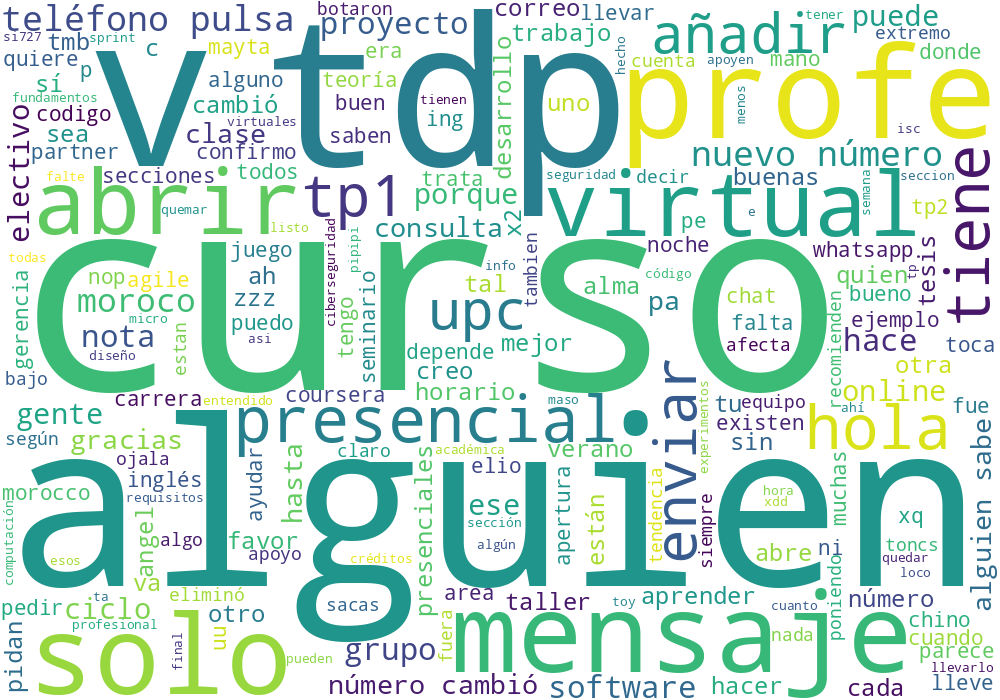

In [6]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd'])

for mensaje in nuevo_df['Mensaje'].values:
    palabras = str(mensaje).lower().split() # Obtener las palabras de cada línea del txt
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' ' # Acumular todas las palabras

wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()